In [82]:
from matplotlib import pyplot as plt
import numpy as np 
import pandas as pd
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator 
import seaborn as sns 

In [66]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

## Lr vs Batch

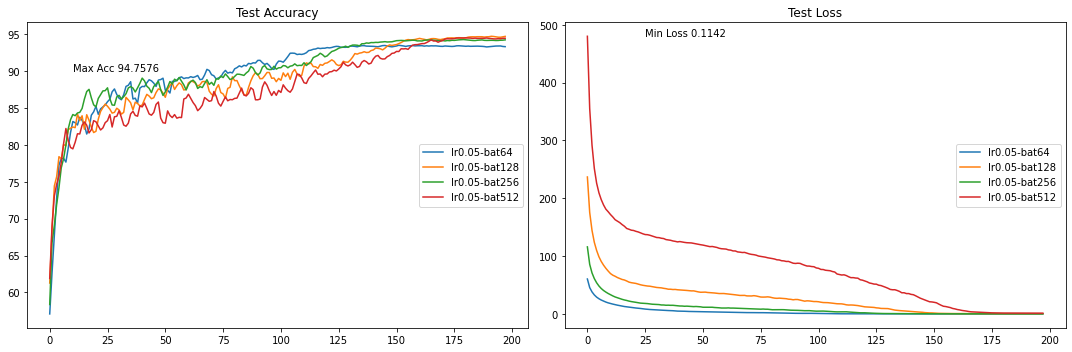

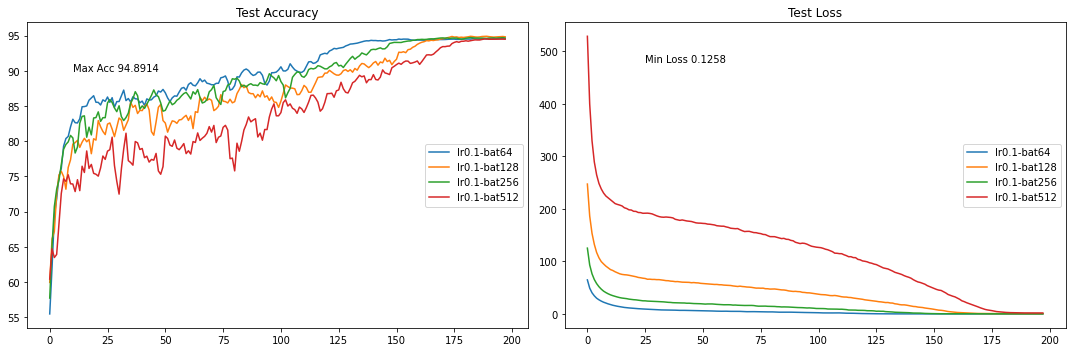

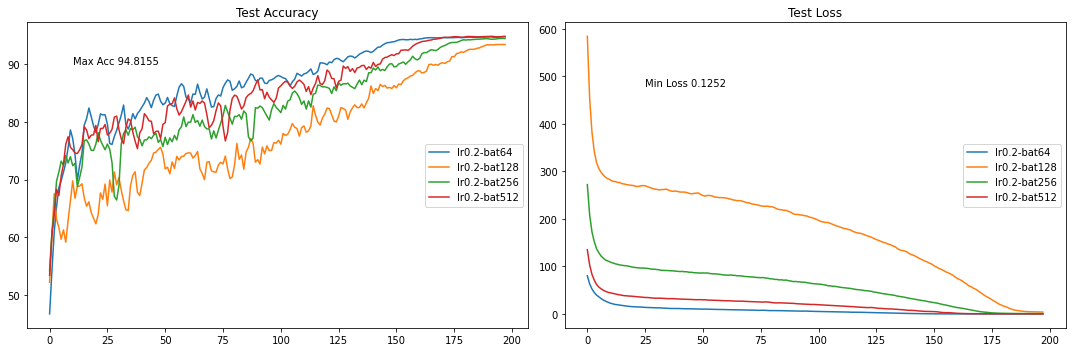

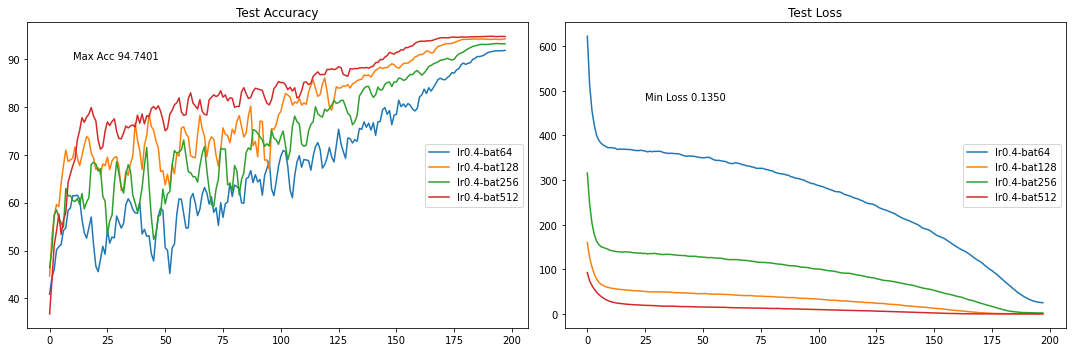

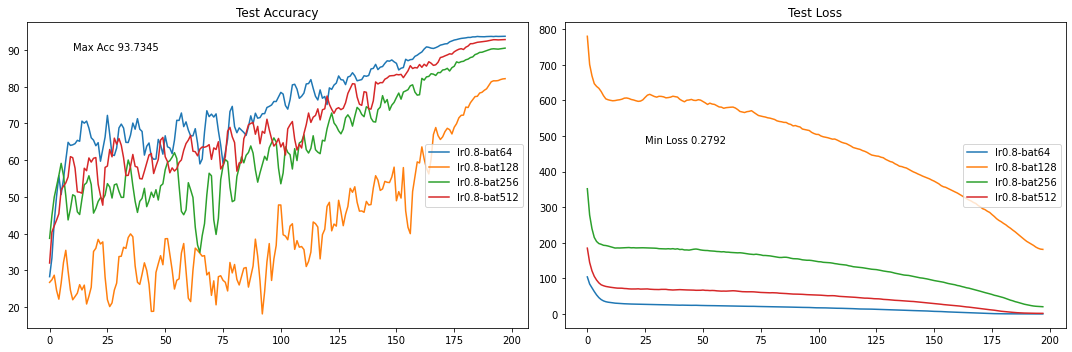

In [201]:
# for lr batch graphs 
import glob 
file_list = []
folder_name_list = []
file_type = 'jpeg'
keywords = ['05', '1', '2', '4', '8']

for keyword in keywords: 
    plot_name = f'lr{keyword}_batch.{file_type}'
    title = f'Loss Accuracy - Lr=0.{keyword} - Batch'
    batches = ['64', '128', '256', '512']
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    i = 0
    best_acc = 0 
    min_loss = 100 
    for folder in glob.glob(f'./scripts/summaries/lr{keyword}batch*'):
        file_name = glob.glob(folder + '/*events*')[0]
        # folder_name = folder.split('/')[-1].strip()
        label = f'lr0.{keyword}-bat{batches[i]}'
        i += 1 
        event_acc = EventAccumulator(file_name)
        event_acc.Reload()
        _, _, val1 = zip(*event_acc.Scalars('Accuracy/test_accuracy'))
        data1 = moving_average(np.array(val1[:]))
        axs[0].plot(data1, label=label)
        axs[0].set_title(title)
        axs[0].legend(loc="center right")
        axs[0].set_title('Test Accuracy')

        _, _, val2 = zip(*event_acc.Scalars('Loss/train_loss'))
        data2 = moving_average(np.array(val2[:]))
        axs[1].plot(data2, label=label)
        axs[1].set_title(title)
        axs[1].legend(loc="center right")
        axs[1].set_title('Test Loss')

        if max(data1) > best_acc:
            best_acc = max(data1)
    
        if min(data2) < min_loss:
            min_loss = min(data2)

    axs[0].text(10, 90, f'Max Acc {best_acc:.4f}')
    axs[1].text(25, 480, f'Min Loss {min_loss:.4f}')
    plt.tight_layout()    
    fig.savefig(f'./plots/{plot_name}')



## Lr vs Momentum

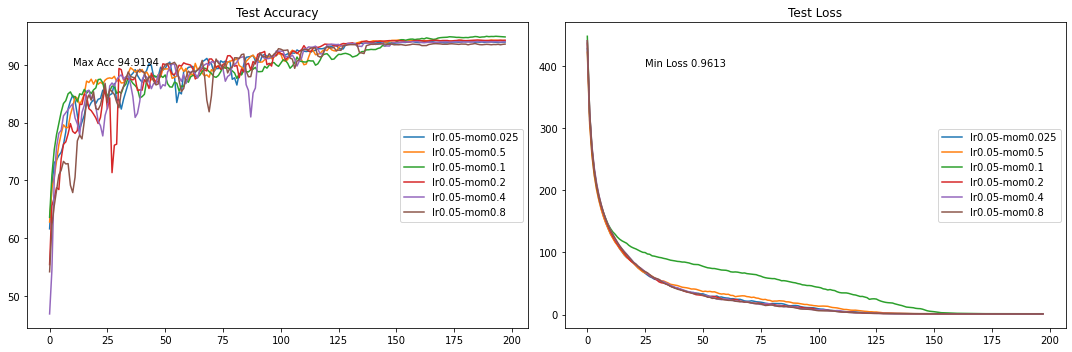

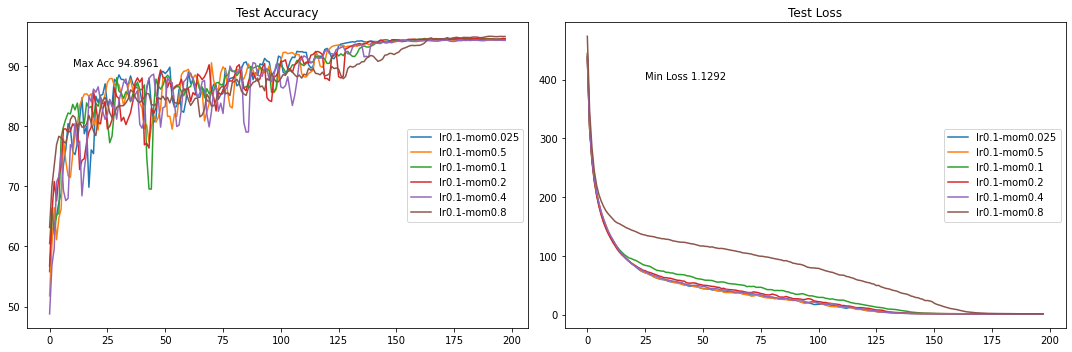

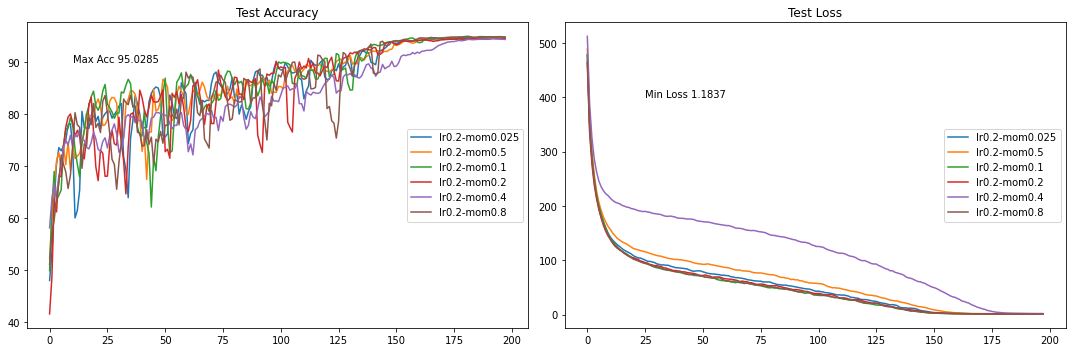

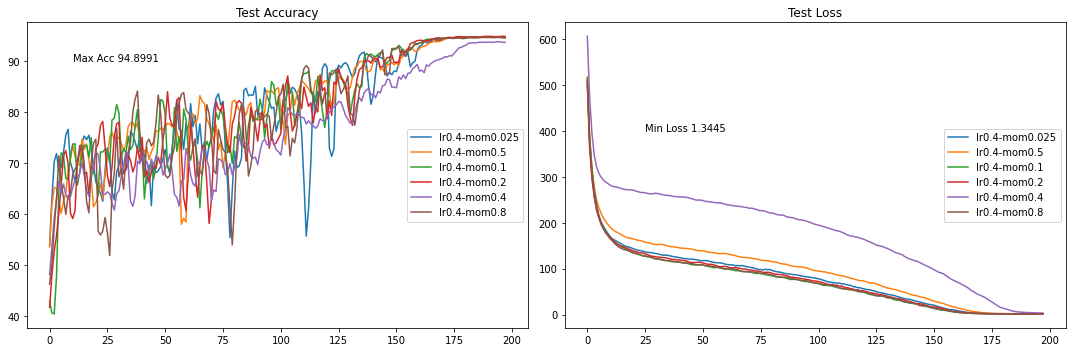

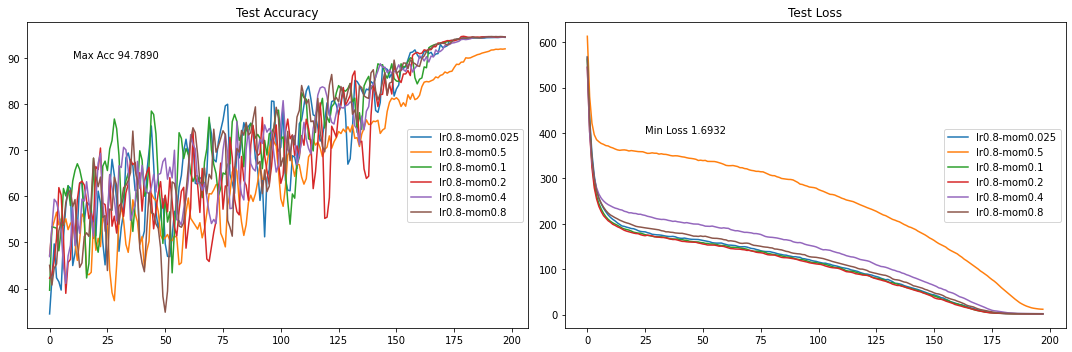

In [204]:
# for lr momentum graphs 
import glob 
file_list = []
folder_name_list = []
file_type = 'pdf'
keywords = ['05', '1', '2', '4', '8']

for keyword in keywords: 
    plot_name = f'lr{keyword}_momentum.{file_type}'
    title = f'Test Accuracy - Lr=0.{keyword} - Momentum'
    momentums = ['0.025', '0.5', '0.1', '0.2', '0.4', '0.8']
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    i = 0
    best_acc = 0 
    min_loss = 100 
    for folder in glob.glob(f'./scripts/summaries/lr{keyword}mom*'):
        file_name = glob.glob(folder + '/*events*')[0]
        # folder_name = folder.split('/')[-1].strip()
        label = f'lr0.{keyword}-mom{momentums[i]}'
        i += 1 
        event_acc = EventAccumulator(file_name)
        event_acc.Reload()
        _, _, val1 = zip(*event_acc.Scalars('Accuracy/test_accuracy'))
        data1 = moving_average(np.array(val1[:]))
        axs[0].plot(data1, label=label)
        axs[0].set_title(title)
        axs[0].legend(loc="center right")
        axs[0].set_title('Test Accuracy')

        _, _, val2 = zip(*event_acc.Scalars('Loss/train_loss'))
        data2 = moving_average(np.array(val2[:]))
        axs[1].plot(data2, label=label)
        axs[1].set_title(title)
        axs[1].legend(loc="center right")
        axs[1].set_title('Test Loss')

        if max(data1) > best_acc:
            best_acc = max(data1)
    
        if min(data2) < min_loss:
            min_loss = min(data2)

    axs[0].text(10, 90, f'Max Acc {best_acc:.4f}')
    axs[1].text(25, 400, f'Min Loss {min_loss:.4f}')
    plt.tight_layout()    
    fig.savefig(f'./plots/{plot_name}')

## Conv Kernel vs Skip Kernel

k3-sk3
k3-sk3
k3-sk5
k3-sk9
k5-sk3
k5-sk3


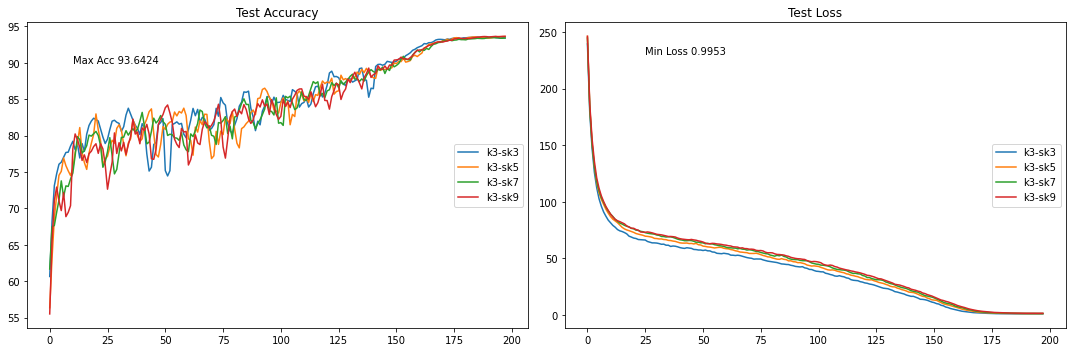

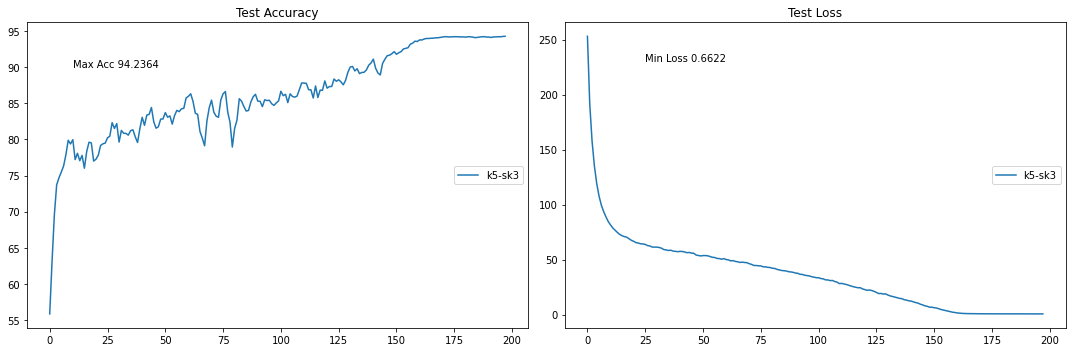

In [211]:

import glob 

file_type = 'jpeg'
keywords = ['3','5']

for keyword in keywords: 
    plot_name = f'kernel{keyword}_sk.{file_type}'
    # title = f'Test Accuracy - Lr=0.{keyword} - Momentum'
    skip_kernels = ['3', '5', '7', '9']
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    i = 0
    best_acc = 0 
    min_loss = 100 
    for folder in glob.glob(f'./scripts/summaries/k{keyword}s*'):
        file_name = glob.glob(folder + '/*events*')[0]
        # folder_name = folder.split('/')[-1].strip()
        label = f'k{keyword}-sk{skip_kernels[i]}'
        i += 1 
        event_acc = EventAccumulator(file_name)
        event_acc.Reload()
        _, _, val1 = zip(*event_acc.Scalars('Accuracy/test_accuracy'))
        data1 = moving_average(np.array(val1[:]))
        axs[0].plot(data1, label=label)
        # axs[0].set_title(title)
        axs[0].legend(loc="center right")
        axs[0].set_title('Test Accuracy')

        _, _, val2 = zip(*event_acc.Scalars('Loss/train_loss'))
        data2 = moving_average(np.array(val2[:]))
        axs[1].plot(data2, label=label)
        # axs[1].set_title(title)
        axs[1].legend(loc="center right")
        axs[1].set_title('Test Loss')

        if max(data1) > best_acc:
            best_acc = max(data1)
            print(label)
    
        if min(data2) < min_loss:
            min_loss = min(data2)

    axs[0].text(10, 90, f'Max Acc {best_acc:.4f}')
    axs[1].text(25, 230, f'Min Loss {min_loss:.4f}')
    plt.tight_layout()    
    fig.savefig(f'./plots/{plot_name}')